# 第4章 ニューラルネットワークの学習
## 4.2 損失関数
### 4.2.1 2乗和誤差

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.5, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.7225


### 4.2.2 交差エントロピー誤差

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.5, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 ミニバッチ学習

In [5]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
np.random.choice(60000, 10)

array([57854, 44364, 17973, 43231, 31771, 18024, 31070, 41190,  1639,
       36950])

### 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装

In [8]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 4.3 数値微分
### 4.3.1 微分

In [10]:
# 悪い実装例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [11]:
np.float32(1e-50)

0.0

In [12]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 数値微分の例

In [13]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

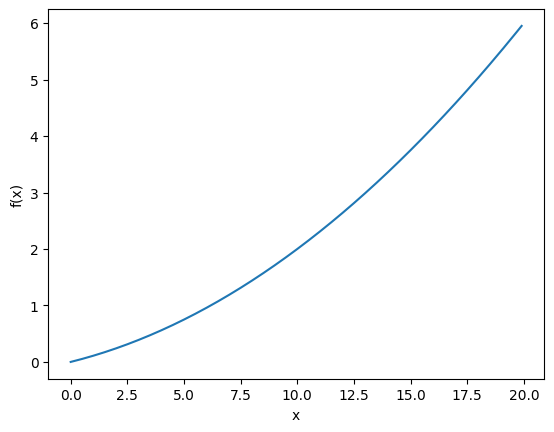

In [14]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [15]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


0.1999999999990898


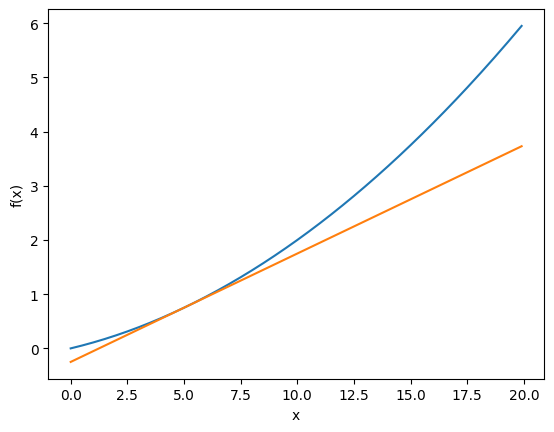

In [16]:
%run gradient_1d.py

### 4.3.3 偏微分

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [18]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [19]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 勾配

In [20]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値をもとに戻す

    return grad

In [21]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


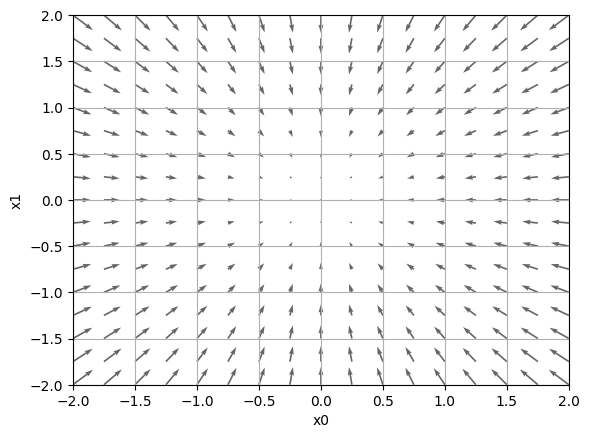

In [22]:
%run gradient_2d.py

### 4.4.1 勾配法

In [23]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for _ in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [24]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

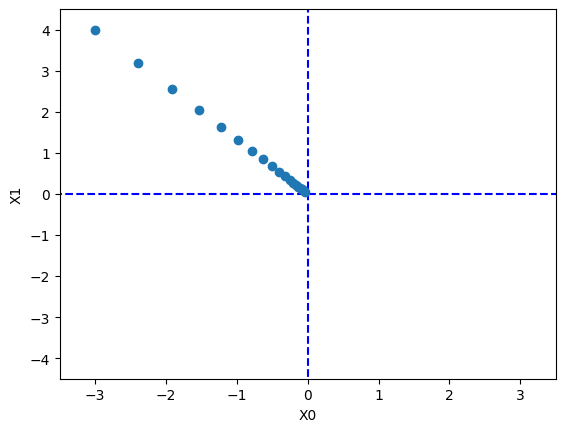

In [25]:
%run gradient_method.py

In [26]:
# 学習率が大きすぎる例: lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [27]:
# 学習率が小さすぎる例: lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

### 4.4.2 ニューラルネットワークに対する勾配

In [28]:
from gradient_simplenet import simpleNet

net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

t = np.array([0, 0, 1])
net.loss(x, t)

[[ 0.40890657  0.1636579  -0.57256446]
 [ 0.61335985  0.24548685 -0.85884669]]
[[ 1.79305846  1.24378384 -1.61254232]
 [ 0.22495204 -1.475867   -0.6226294 ]]
[ 1.27829191 -0.58200999 -1.52789185]


3.0017985520255532

In [29]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.49339538  0.07678497 -0.57018035]
 [ 0.74009307  0.11517746 -0.85527053]]


In [30]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 学習アルゴリズムの実装
### 4.5.1 2層ニューラルネットワークのクラス

In [31]:
from two_layer_net import TwoLayerNet

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [32]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [33]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 ミニバッチ学習の実装

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7855166666666666, 0.7907
train acc, test acc | 0.8773666666666666, 0.8817
train acc, test acc | 0.8985166666666666, 0.9017
train acc, test acc | 0.9067666666666667, 0.9104
train acc, test acc | 0.91495, 0.9183
train acc, test acc | 0.9202333333333333, 0.9232
train acc, test acc | 0.9235333333333333, 0.9263
train acc, test acc | 0.9279, 0.9297
train acc, test acc | 0.93075, 0.9337
train acc, test acc | 0.9341, 0.9361
train acc, test acc | 0.93565, 0.9367
train acc, test acc | 0.9389833333333333, 0.938
train acc, test acc | 0.9414666666666667, 0.9415
train acc, test acc | 0.944, 0.9428
train acc, test acc | 0.9453333333333334, 0.945
train acc, test acc | 0.9473666666666667, 0.9466


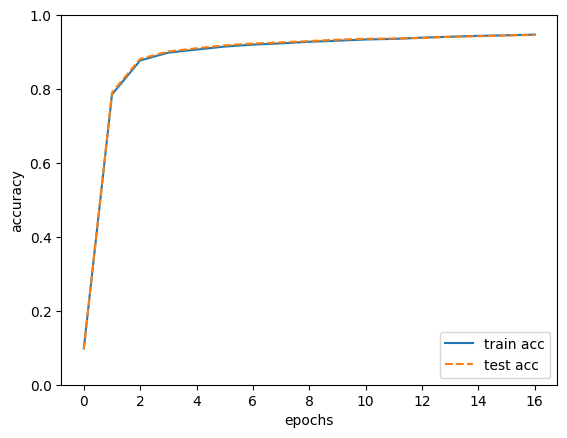

In [34]:
%run train_neuralnet.py